In [463]:
import pandas as pd
# for mathematical calculations
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# for data visualization
import matplotlib.pyplot as plt
# reading csv file
data=pd.read_csv("indata.csv")

In [464]:
data.head()

,Username,Followers,Follows,Posts,Private,ExternalURL,mutuals,followback
0,inst1,240288,26,563,False,yes,1,0
1,inst2,36526536,102,852,False,yes,35,0
2,inst3,50306889,28,19963,False,yes,28,0
3,inst4,9,42,0,False,no,0,0
4,inst5,1011,222,47,True,no,0,0


In [465]:
# introducing new features fol and folfol
data['fol']=data['Followers']/(data['Followers']-data['Follows'])
data['folfol']=data['Follows']/data['Followers']

In [466]:
data.head()

,Username,Followers,Follows,Posts,Private,ExternalURL,mutuals,followback,fol,folfol
0,inst1,240288,26,563,False,yes,1,0,1.000108,1.082035e-04
1,inst2,36526536,102,852,False,yes,35,0,1.000003,2.792490e-06
2,inst3,50306889,28,19963,False,yes,28,0,1.000001,5.565838e-07
3,inst4,9,42,0,False,no,0,0,-0.272727,4.666667e+00
4,inst5,1011,222,47,True,no,0,0,1.281369,2.195846e-01


In [467]:
data['Private'].value_counts()

False    91
True     81
Name: Private, dtype: int64

In [468]:
data['ExternalURL'].value_counts()

no     127
yes     45
Name: ExternalURL, dtype: int64

In [469]:
# printing data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
Username       172 non-null object
Followers      172 non-null int64
Follows        172 non-null int64
Posts          172 non-null int64
Private        172 non-null bool
ExternalURL    172 non-null object
mutuals        172 non-null int64
followback     172 non-null int64
fol            172 non-null float64
folfol         172 non-null float64
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 11.0+ KB


In [470]:
data.describe()

,Followers,Follows,Posts,mutuals,followback,fol,folfol
count,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1.710792e+06,532.151163,588.162791,6.372093,0.337209,3.395608,1.079224
std,8.117861e+06,767.878204,2283.606301,9.249683,0.474137,13.755028,1.150947
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000,-16.210526,0.000000
25%,2.000000e+02,139.000000,32.000000,0.000000,0.000000,-1.165624,0.219331
50%,3.260000e+02,277.000000,86.000000,1.000000,0.000000,1.000170,0.887302
75%,2.717000e+03,587.000000,230.250000,13.000000,1.000000,1.966102,1.511905
max,5.030689e+07,5428.000000,19963.000000,35.000000,1.000000,89.250000,5.881944


In [471]:
data['followback'].value_counts()

0    114
1     58
Name: followback, dtype: int64

In [472]:
# standardization of fol and folfol
mean=np.mean(data['fol'])
std=np.std(data['fol'])
mean=float(mean)
std=float(std)
data['fol']=(data['fol']-mean)/std
mean=np.mean(data['folfol'])
std=np.std(data['folfol'])
mean=float(mean)
std=float(std)
data['folfol']=(data['folfol']-mean)/std
data

,Username,Followers,Follows,Posts,Private,ExternalURL,mutuals,followback,fol,folfol
0,inst1,240288,26,563,False,yes,1,0,-0.174663,-0.940327
1,inst2,36526536,102,852,False,yes,35,0,-0.174671,-0.940419
2,inst3,50306889,28,19963,False,yes,28,0,-0.174671,-0.940421
3,inst4,9,42,0,False,no,0,0,-0.267469,3.126049
4,inst5,1011,222,47,True,no,0,0,-0.154155,-0.749078
5,inst6,169,36,2,False,no,0,0,-0.154935,-0.754800
6,inst7,538,118,144,False,no,0,1,-0.154186,-0.749299
7,inst8,214,354,15,True,no,24,1,-0.359036,0.501031
8,inst9,113,184,126,True,yes,22,1,-0.363628,0.478474
9,inst10,265,479,57,False,no,24,1,-0.337873,0.634651


In [473]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=4)

In [474]:
train.shape

(137, 10)

In [475]:
test.shape

(35, 10)

In [476]:
train['followback'].value_counts()

0    94
1    43
Name: followback, dtype: int64

Text(0, 0.5, 'followback')

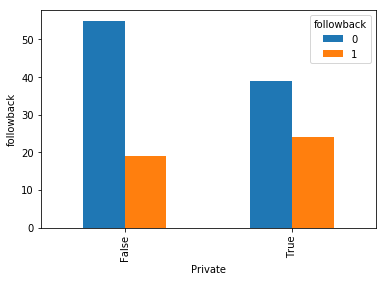

In [477]:
# visualizing data
pd.crosstab(train.Private,train.followback).plot(kind='bar')
plt.xlabel('Private')
plt.ylabel('followback')

Text(0, 0.5, 'followback')

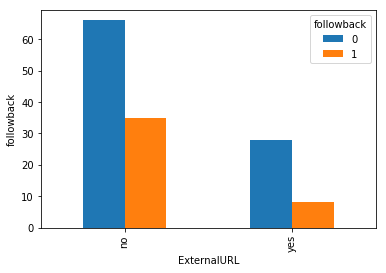

In [478]:
pd.crosstab(train.ExternalURL,train.followback).plot(kind='bar')
plt.xlabel('ExternalURL')
plt.ylabel('followback')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10403790>,
      dtype=object)

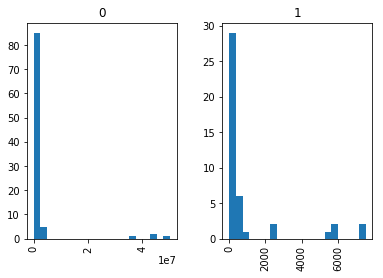

In [479]:
train.hist(column="Followers",by="followback",bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F395950>,
      dtype=object)

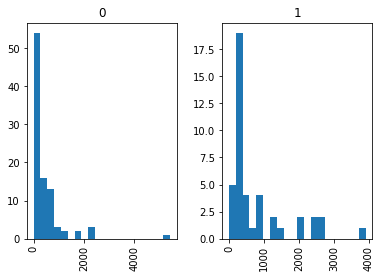

In [480]:
train.hist(column="Follows",by="followback",bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F3B9D70>,
      dtype=object)

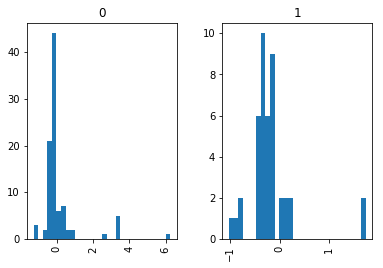

In [481]:
train.hist(column="fol",by="followback",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x105F7530>,
      dtype=object)

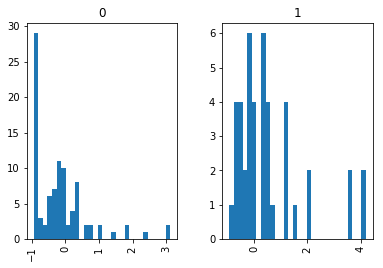

In [482]:
train.hist(column="folfol",by="followback",bins=30)

In [483]:
cols = list(train.columns.values)
cols

['Username',
 'Followers',
 'Follows',
 'Posts',
 'Private',
 'ExternalURL',
 'mutuals',
 'followback',
 'fol',
 'folfol']

In [484]:
train = train[['Username','Followers','Follows','Posts','Private','ExternalURL','mutuals','fol','folfol','followback']]
test = test[['Username','Followers','Follows','Posts','Private','ExternalURL','mutuals','fol','folfol','followback']]

In [485]:
train.head()

,Username,Followers,Follows,Posts,Private,ExternalURL,mutuals,fol,folfol,followback
2,inst3,50306889,28,19963,False,yes,28,-0.174671,-0.940421,0
86,inst87,277,212,45,True,no,22,0.063138,-0.273512,1
29,inst30,313,694,88,True,no,18,-0.307483,0.991663,0
24,inst25,392,319,80,True,no,0,0.143949,-0.231308,1
161,inst162,562,782,136,True,no,0,-0.433843,0.272078,0


In [486]:
# replacing yes and no in ExternalURL column with 1 and 0 respectively
# replacing True and False with 1 and 0 respectively in Private column
train_copy=train.copy()
train_copy['ExternalURL'] = train_copy['ExternalURL'].map({'yes':1,'no':0})
train_copy['Private'] = train_copy['Private'].map({True:1,False:0})

In [487]:
test_copy=test.copy()
test_copy['ExternalURL'] = test_copy['ExternalURL'].map({'yes':1,'no':0})
test_copy['Private'] = test_copy['Private'].map({True:1,False:0})

In [488]:
# introducing new feature Privext which is a sum of Private and ExternalURL columns
train_copy['Privext']=train_copy['Private']+train_copy['ExternalURL']
test_copy['Privext']=test_copy['Private']+test_copy['ExternalURL']

In [489]:
train_copy = train_copy[['Username','Followers','Follows','Posts','Private','ExternalURL','mutuals','fol','folfol','Privext','followback']]
test_copy = test_copy[['Username','Followers','Follows','Posts','Private','ExternalURL','mutuals','fol','folfol','Privext','followback']]

In [490]:
train_copy.head()

,Username,Followers,Follows,Posts,Private,ExternalURL,mutuals,fol,folfol,Privext,followback
2,inst3,50306889,28,19963,0,1,28,-0.174671,-0.940421,1,0
86,inst87,277,212,45,1,0,22,0.063138,-0.273512,1,1
29,inst30,313,694,88,1,0,18,-0.307483,0.991663,1,0
24,inst25,392,319,80,1,0,0,0.143949,-0.231308,1,1
161,inst162,562,782,136,1,0,0,-0.433843,0.272078,1,0


Text(0, 0.5, 'followback')

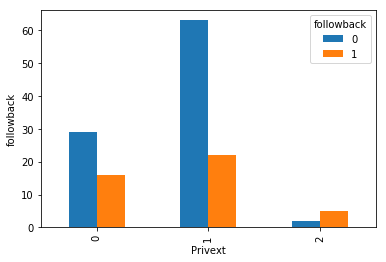

In [491]:
pd.crosstab(train_copy.Privext,train_copy.followback).plot(kind='bar')
plt.xlabel('Privext')
plt.ylabel('followback')

In [563]:
# 500 number of trees, 5 random_state and 3 max_depth 
clf = RandomForestClassifier(n_estimators=500, random_state=5,max_depth=3)
clf = clf.fit(train_copy.iloc[:,1:10], train_copy.iloc[:,-1])

In [564]:
# feature importance 
labels=['Followers','Follows','Posts','Private','ExternalURL','mutuals','fol','folfol','Privext'];
for feature in zip(labels,clf.feature_importances_):
    print(feature)

('Followers', 0.13830524394787067)
('Follows', 0.22330881298985994)
('Posts', 0.11073624765664127)
('Private', 0.0058427804371500225)
('ExternalURL', 0.004652826136396206)
('mutuals', 0.21718304902414948)
('fol', 0.08749488833175803)
('folfol', 0.18979280780545688)
('Privext', 0.022683343670717216)


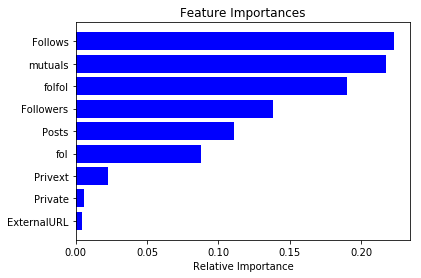

In [565]:
# plotting the features in decreasing order of importance
features = labels
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [566]:
# important features
important_train=train_copy[['folfol','fol','mutuals','Follows']]
important_test=test_copy[['folfol','fol','mutuals','Follows']]

In [572]:
# predicitng the followback and checking accuracy score
new_clf = RandomForestClassifier(n_estimators=500,max_depth=2,random_state=5,)
new_clf.fit(important_train, train_copy.iloc[:,-1])
y_pred = new_clf.predict(important_test)
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.8

In [573]:
# confusion matrix
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[20,  0],
       [ 7,  8]], dtype=int64)

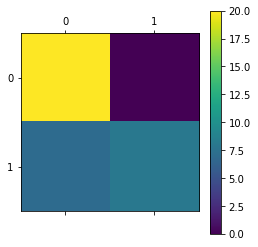

In [574]:
plt.matshow(results)
plt.colorbar()

In [575]:
# printing precision score for randomforestclassifier
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)

1.0


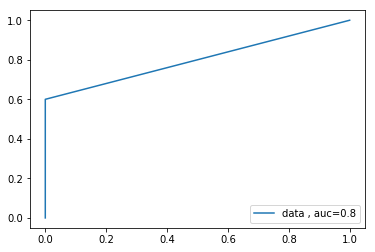

In [571]:
# AUC score for randomforestclassifier
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [576]:
# printing classification report for randomforestclassifier
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       1.00      0.53      0.70        15

   micro avg       0.80      0.80      0.80        35
   macro avg       0.87      0.77      0.77        35
weighted avg       0.85      0.80      0.78        35



In [577]:
# logisticregression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf=clf.fit(train_copy.iloc[:,1:10], train_copy.iloc[:,-1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [578]:
y_pred=clf.predict(test_copy.iloc[:,1:10])

In [579]:
# classification report for logistic regression 
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.64      0.47      0.54        15

   micro avg       0.66      0.66      0.66        35
   macro avg       0.65      0.63      0.63        35
weighted avg       0.65      0.66      0.65        35



In [580]:
# accuracy score for logistic regression
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.6571428571428571

In [581]:
# confusion matrix for logistic regression
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[16,  4],
       [ 8,  7]], dtype=int64)

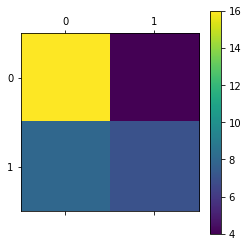

In [582]:
plt.matshow(results)
plt.colorbar()

In [583]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)

0.6363636363636364


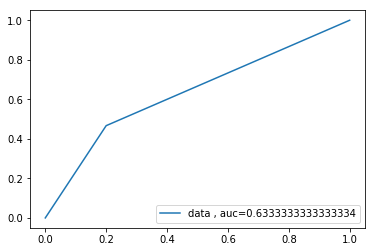

In [584]:
# AUC score for logistic regression
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# on comparing we find random forest fits the given data perfectly